In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data=pd.read_csv('drive/MyDrive/Colab Notebooks/機器學習周信宏/第13章/image')

data=data.drop('Id', axis=1)  #去除不必要的欄位

num_data=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for col in num_data:
    # min max normalization
    data[col]=(data[col]-data[col].min())/(data[col].max()-data[col].min())  #資料正規化

y=pd.get_dummies(data.pop('Species')).values  #訓練資料的答案 用get_dummies轉變為 one-hot encoding
#訓練資料需要去除答案那欄
x=data.values



In [ ]:
import random
import numpy as np

xy=list(zip(x,y))
random.shuffle(xy)
x,y=zip(*xy)
x=np.array(x)
y=np.array(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)   #切出20%的資料當作測試資料

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
model=Sequential()
# (1)的type和(1,)的type不同，前者視為int，所以需要加逗號
# 三層全連接層
model.add(Dense(1024, activation='relu', input_shape=(4,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))

#訓練模型
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history=model.fit(
        x_train, y_train,
        # 資料量不夠，直接test
        validation_data=(x_test, y_test),
        batch_size=32,
        epochs=30)


Epoch 1/30
4/4 [==============================] - 3s 58ms/step - loss: 0.9902 - acc: 0.4917 - val_loss: 0.7657 - val_acc: 0.6000
Epoch 2/30
4/4 [==============================] - 0s 8ms/step - loss: 0.6343 - acc: 0.6833 - val_loss: 0.5167 - val_acc: 0.6000
Epoch 3/30
4/4 [==============================] - 0s 10ms/step - loss: 0.4491 - acc: 0.7583 - val_loss: 0.4954 - val_acc: 0.6000
Epoch 4/30
4/4 [==============================] - 0s 9ms/step - loss: 0.3776 - acc: 0.7583 - val_loss: 0.4131 - val_acc: 0.8000
Epoch 5/30
4/4 [==============================] - 0s 8ms/step - loss: 0.3795 - acc: 0.8167 - val_loss: 0.4339 - val_acc: 0.7667
Epoch 6/30
4/4 [==============================] - 0s 8ms/step - loss: 0.3064 - acc: 0.8250 - val_loss: 0.3325 - val_acc: 0.8333
Epoch 7/30
4/4 [==============================] - 0s 8ms/step - loss: 0.2625 - acc: 0.8833 - val_loss: 0.3222 - val_acc: 0.9000
Epoch 8/30
4/4 [==============================] - 0s 8ms/step - loss: 0.2277 - acc: 0.9250 - val_loss:

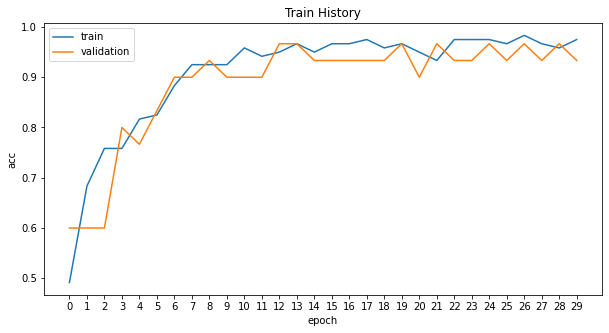

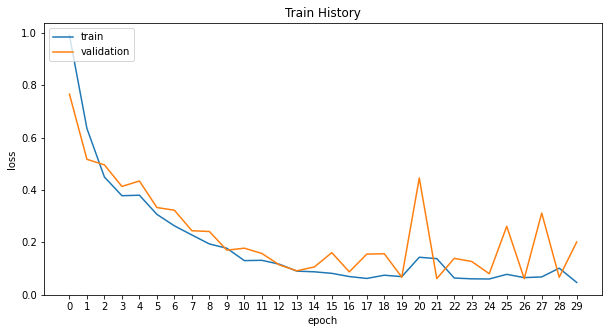

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history):
    plt.figure(figsize=(10,5))
    plt.plot(train_history.history['acc'])
    plt.plot(train_history.history['val_acc'])
    plt.xticks([i for i in range(len(train_history.history['acc']))])
    plt.title('Train History')
    plt.ylabel('acc')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.figure(figsize=(10,5))
    plt.plot(train_history.history['loss'])
    plt.plot(train_history.history['val_loss'])
    plt.xticks([i for i in range(len(train_history.history['loss']))])
    plt.title('Train History')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(history)


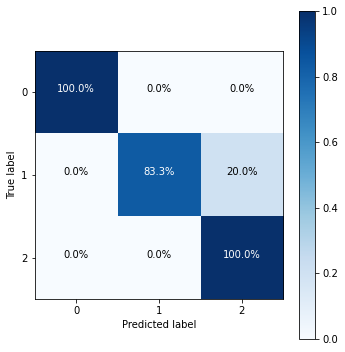

In [ ]:
# 用confusion_matrix預測testing data(用熱力圖)
from sklearn.metrics import confusion_matrix
def show_confusion_matrix(cnf_matrix, classes_num):
    cnf_matrix=cnf_matrix.astype('float')/cnf_matrix.sum(axis=1)
    plt.figure(figsize=(5,5))
    plt.imshow(cnf_matrix, cmap='Blues')
    plt.colorbar()
    plt.xticks([i for i in range(classes_num)])
    plt.yticks([i for i in range(classes_num)])
    thresh = cnf_matrix.max() / 2.
    for i in range(classes_num):
        for j in range(classes_num):
            plt.text(
                    j, i,
                    format(cnf_matrix[i, j]*100, '.1f')+'%',
                    horizontalalignment="center",
                    color="white" if cnf_matrix[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    
y_true=np.argmax(y_test, axis=1)
y_pred=np.argmax(model.predict(x_test), axis=1)
cnf_matrix = confusion_matrix(y_true, y_pred)
show_confusion_matrix(cnf_matrix, 3)